# Part 3. Tumor cell analyses of SCLC

In [21]:
library(Seurat)
library(ggplot2)
library(RColorBrewer)
library(reshape2)
library(ggalluvial)
library(clusterProfiler)
library(org.Hs.eg.db)
library(SingleCellExperiment)
library(scales)
library(pheatmap)
library(harmony)
library(reticulate)

setwd("/media/inspur/AS2150G2/LDK/sclc_metastasis/")
getwd()

[1] "/media/inspur/AS2150G2/LDK/sclc_metastasis"

In [22]:
# load data from part 2
load("data_out/2.SCLC.filter.rdata")
ls()

[1] "SCLC.filter" "SCLC.tumor"

In [23]:
table(SCLC.filter$celltype, SCLC.filter$orig.ident)
table(Idents(SCLC.filter))

                
                   S1   S2   S3   S4   S5   S6   S7
  tumor          1587 2601   38 2330   74 4896  377
  CD4T             89  155  407   93  832  520  291
  Monocytes        63  475 1018  117  310  138   42
  Neutrophils      19  278 1920   47  107   61   15
  CD8T             88  107  614   25  390  211   76
  NK               71  208 1165   24  202  237   46
  B cells          12   68  345   34   26  115  198
  Megakaryocytes    2   10  184   35   17    7    2
  Macrophages      12   58   11   20   24  120  133
  DC                4   17   35    9   67   27    6
  Plasma            2   15   25    4   26   29   18


         tumor           CD4T      Monocytes    Neutrophils           CD8T 
         11903           2387           2163           2447           1511 
            NK        B cells Megakaryocytes    Macrophages             DC 
          1953            798            257            378            165 
        Plasma 
           119 

#### S3 has few tumor cells (38 cells), remove it before further analysis

In [24]:
# subset for tumor cells
subset(SCLC.filter,idents = "tumor")->SCLC.tumor
SCLC.tumor
# save(SCLC.tumor, file = "data_out/3.SCLC.tumor.rdata")


An object of class Seurat 
33538 features across 11903 samples within 1 assay 
Active assay: RNA (33538 features, 3000 variable features)
 3 dimensional reductions calculated: pca, umap, harmony

In [25]:
SCLC.tumor <- subset(SCLC.tumor, orig.ident != "S3")
SCLC.tumor
table(SCLC.tumor$orig.ident)

An object of class Seurat 
33538 features across 11865 samples within 1 assay 
Active assay: RNA (33538 features, 3000 variable features)
 3 dimensional reductions calculated: pca, umap, harmony


  S1   S2   S4   S5   S6   S7 
1587 2601 2330   74 4896  377 

In [26]:
SCLC.tumor <- FindVariableFeatures(SCLC.tumor, selection.method = "vst", nfeatures = 3500)
SCLC.tumor <- ScaleData(SCLC.tumor, features = VariableFeatures(object = SCLC.tumor))

Centering and scaling data matrix



In [27]:
library(reticulate)
# use_python ("/home/inspur/miniconda3/envs/sclc_ldk/bin/python3.10") 
# use_python ("~/.virtualenvs/r-reticulate/lib/python3.7/site-packages")

In [28]:
SCLC.tumor <- RunPCA(SCLC.tumor, npcs = 45, verbose = FALSE, features = VariableFeatures(object = SCLC.tumor),seed.use=42)
SCLC.tumor <- RunHarmony(SCLC.tumor, "orig.ident",theta=0.5,lambda=0.5)

Harmony 1/10

Harmony 2/10

Harmony converged after 2 iterations

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”


In [29]:
SCLC.tumor <- RunUMAP(SCLC.tumor, umap.method = 'umap-learn',reduction = "harmony", dims = 1:45, metric="correlation",seed.use=10)

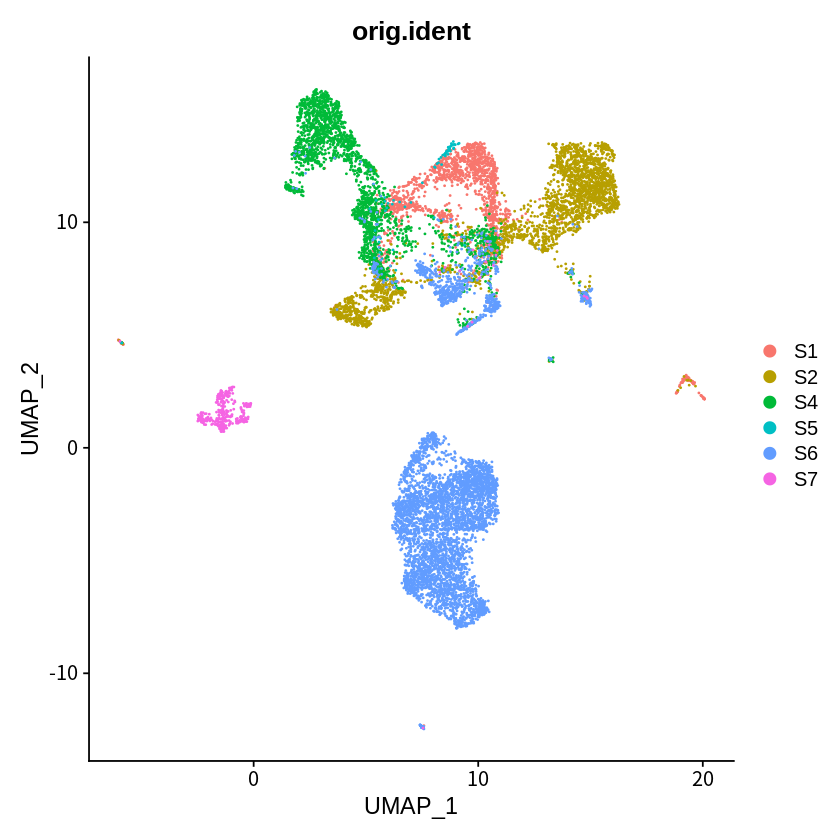

In [30]:
DimPlot(SCLC.tumor, reduction = "umap",group.by="orig.ident")

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 11865
Number of edges: 445503

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9648
Number of communities: 10
Elapsed time: 1 seconds


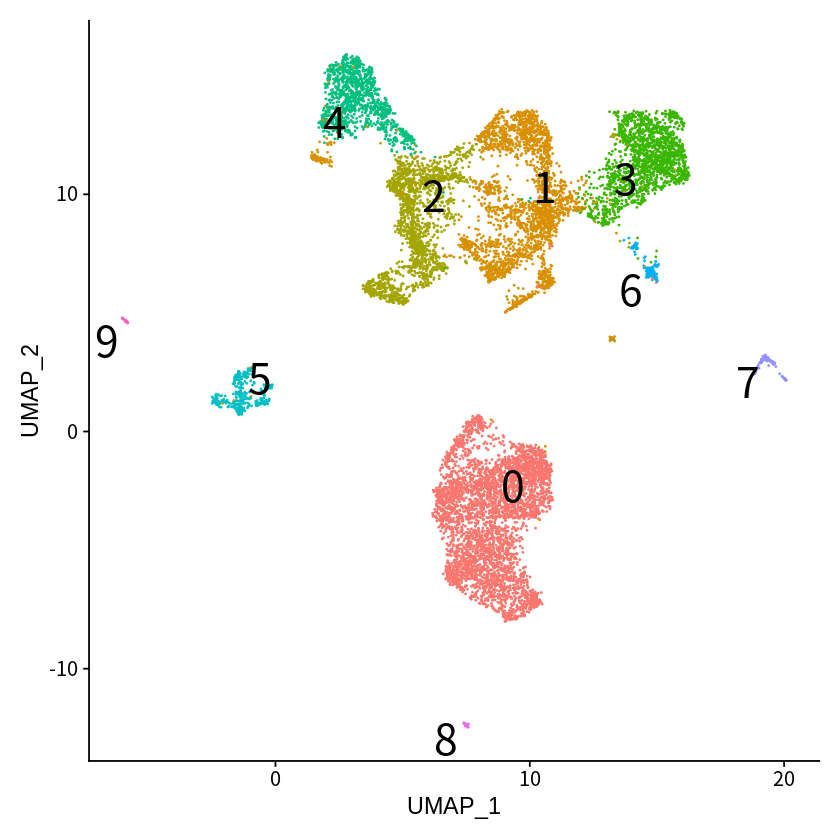

In [45]:
SCLC.tumor <- FindNeighbors(SCLC.tumor,  reduction="harmony",dims = 1:45)
SCLC.tumor <- FindClusters(SCLC.tumor,resolution = 0.1)
DimPlot(SCLC.tumor, reduction = "umap",label=T,repel=T, label.size = 9) + NoLegend()

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 11865
Number of edges: 445503

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9460
Number of communities: 11
Elapsed time: 1 seconds


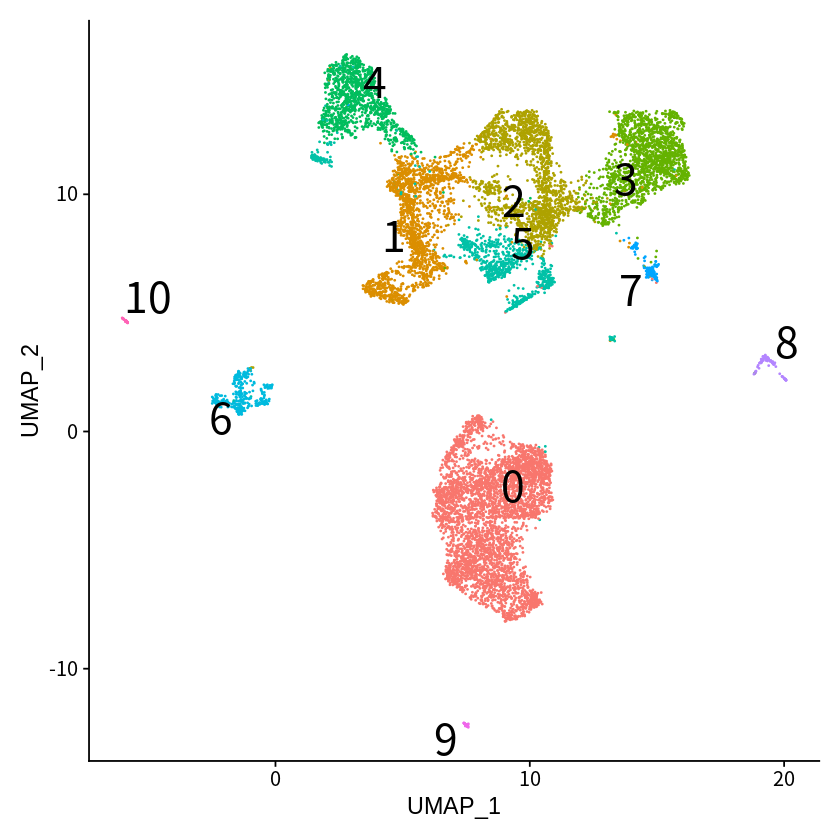

In [46]:
SCLC.tumor <- FindNeighbors(SCLC.tumor,  reduction="harmony",dims = 1:45)
SCLC.tumor <- FindClusters(SCLC.tumor,resolution = 0.2)
DimPlot(SCLC.tumor, reduction = "umap",label=T,repel=T, label.size = 9) + NoLegend()

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 11865
Number of edges: 445503

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9330
Number of communities: 14
Elapsed time: 1 seconds


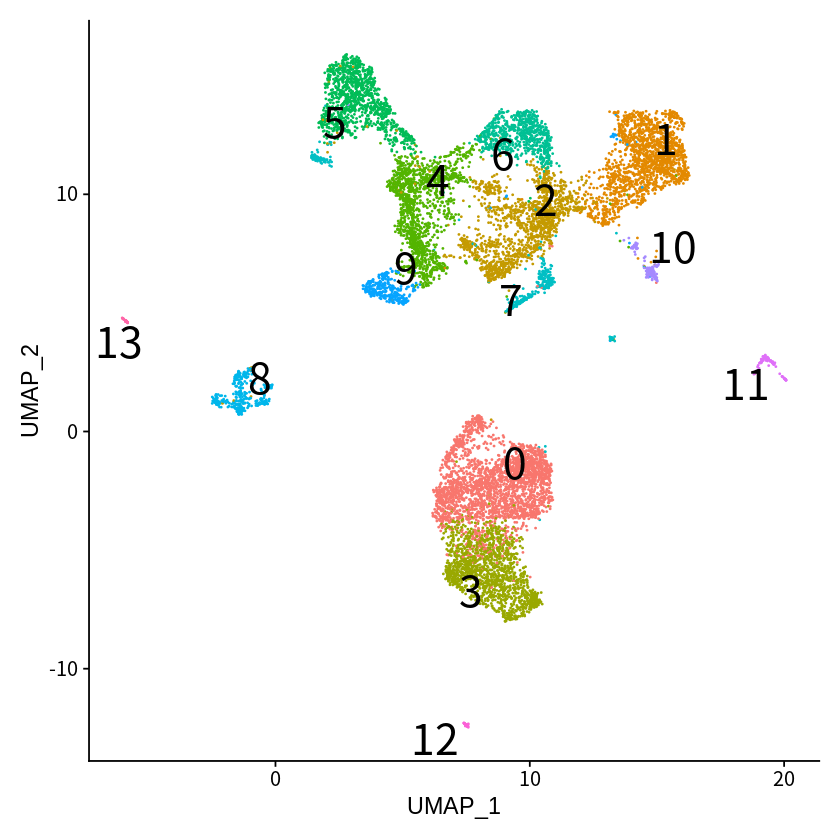

In [57]:
SCLC.tumor <- FindNeighbors(SCLC.tumor,  reduction="harmony",dims = 1:45)
SCLC.tumor <- FindClusters(SCLC.tumor,resolution = 0.3)
DimPlot(SCLC.tumor, reduction = "umap",label=T,repel=T, label.size = 9) + NoLegend()

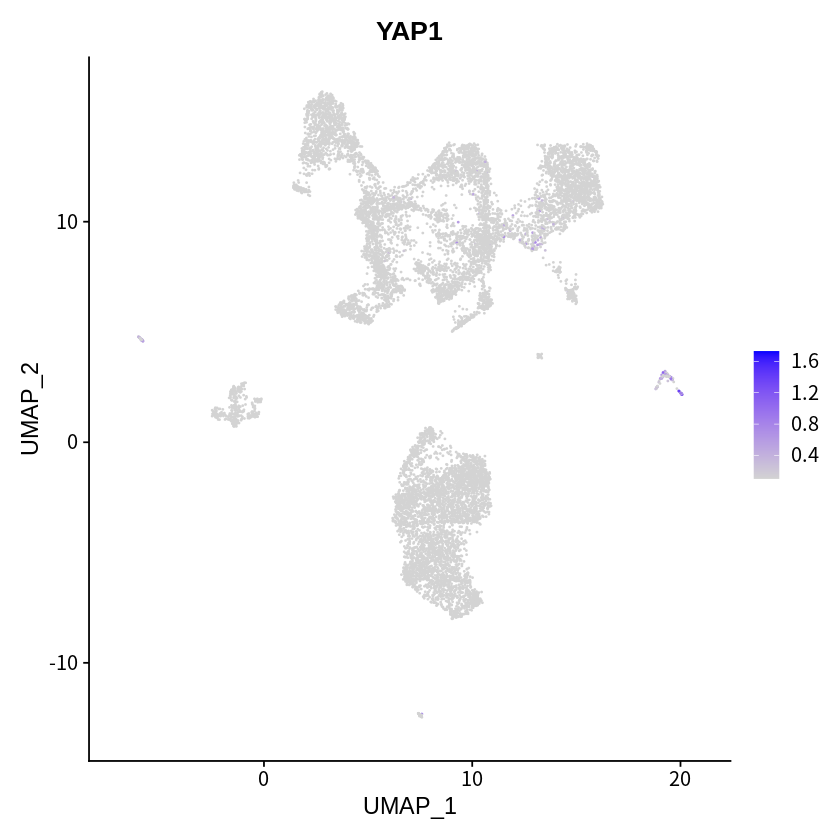

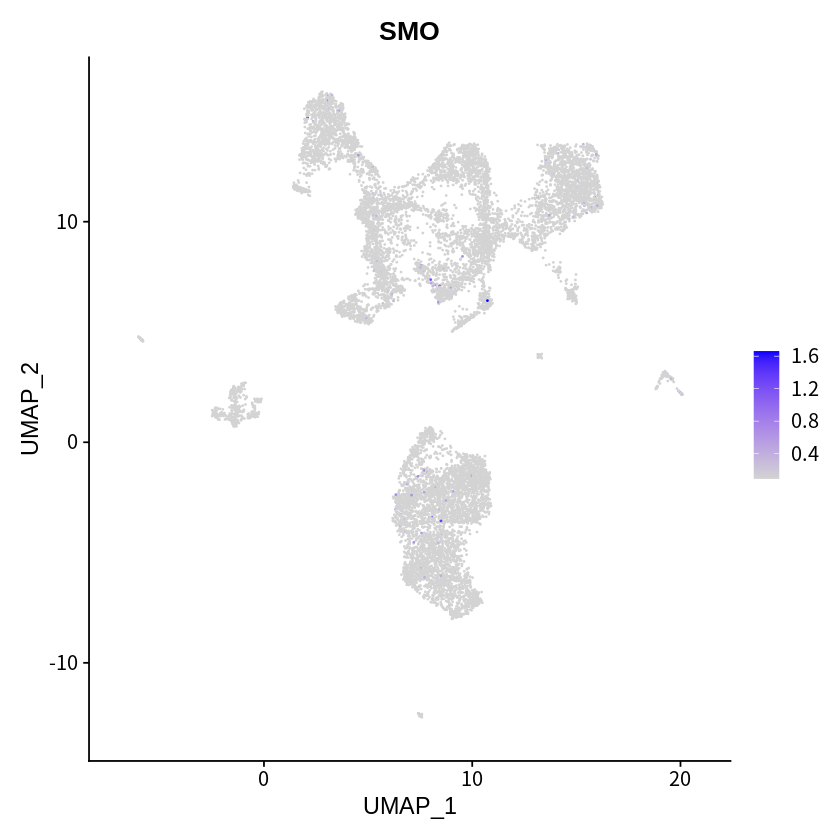

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



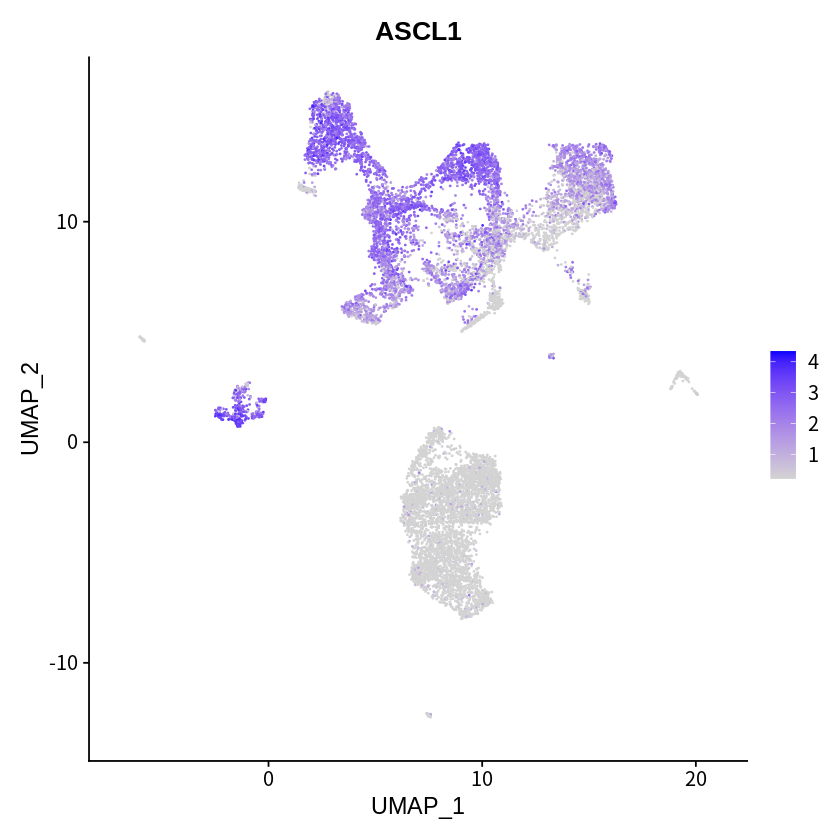

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



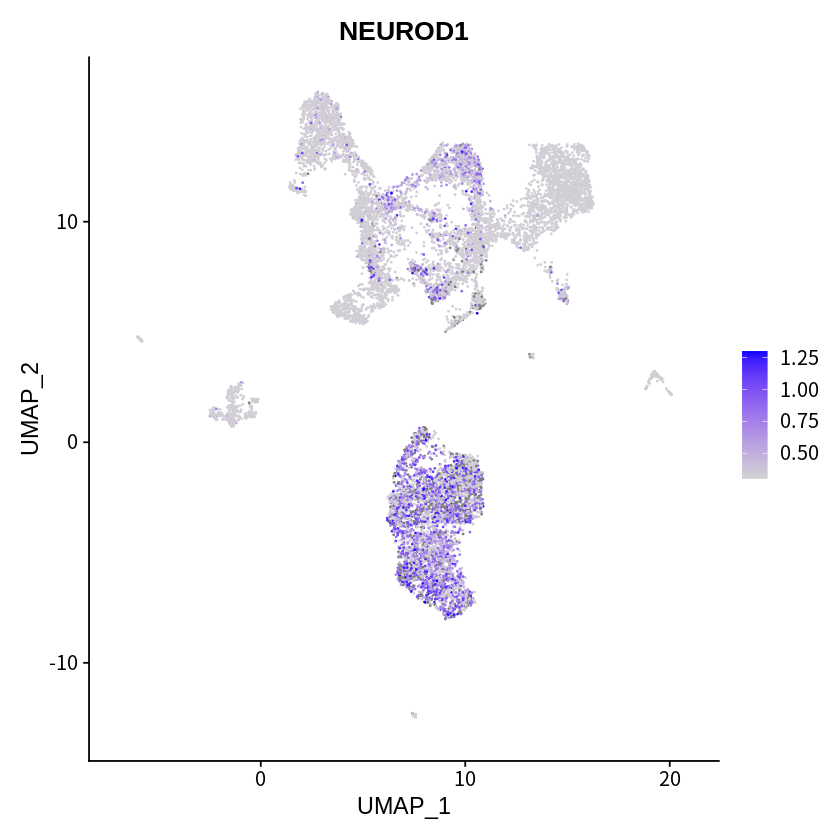

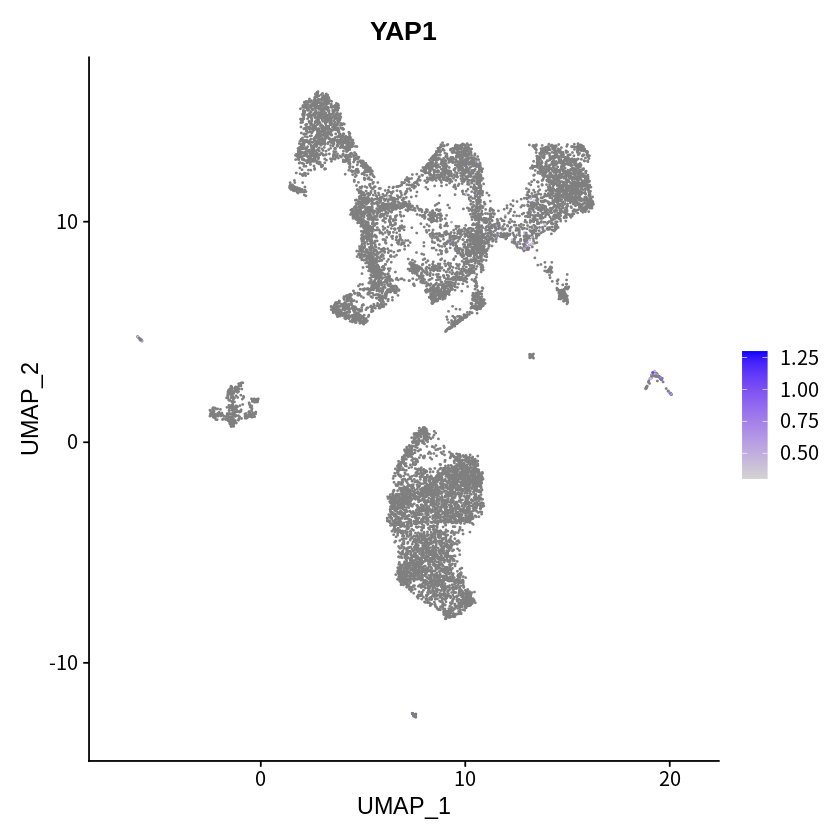

In [180]:
FeaturePlot(SCLC.tumor, features = c("YAP1"), min.cutoff = "q1")
FeaturePlot(SCLC.tumor, features = c("SMO"), min.cutoff = "q1")

par(mfrow=c(1,2))
FeaturePlot(SCLC.tumor, features = c("ASCL1"), min.cutoff = "q1")
FeaturePlot(SCLC.tumor, features = c("NEUROD1"), min.cutoff = "q10")+scale_color_gradientn( colours = c('lightgrey', 'blue'),  limits = c(0.3, 1.3))

FeaturePlot(SCLC.tumor, features = c("YAP1"), min.cutoff = "q10")+scale_color_gradientn( colours = c('lightgrey', 'blue'),  limits = c(0.3, 1.3))


# FeaturePlot(SCLC.tumor, features = c("ASCL1","NEUROD1"), min.cutoff = "q1")+scale_color_gradientn( colours = c('lightgrey', 'blue'),  limits = c(0.17, 1.5))
# FeaturePlot(SCLC.tumor, features = c("ASCL1","NEUROD1"), min.cutoff = "q1")+scale_color_gradientn( colours = c('lightgrey', 'blue'),  limits = c(0.17, 1.5))

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
“Removed 19 rows containing missing values (geom_point).”


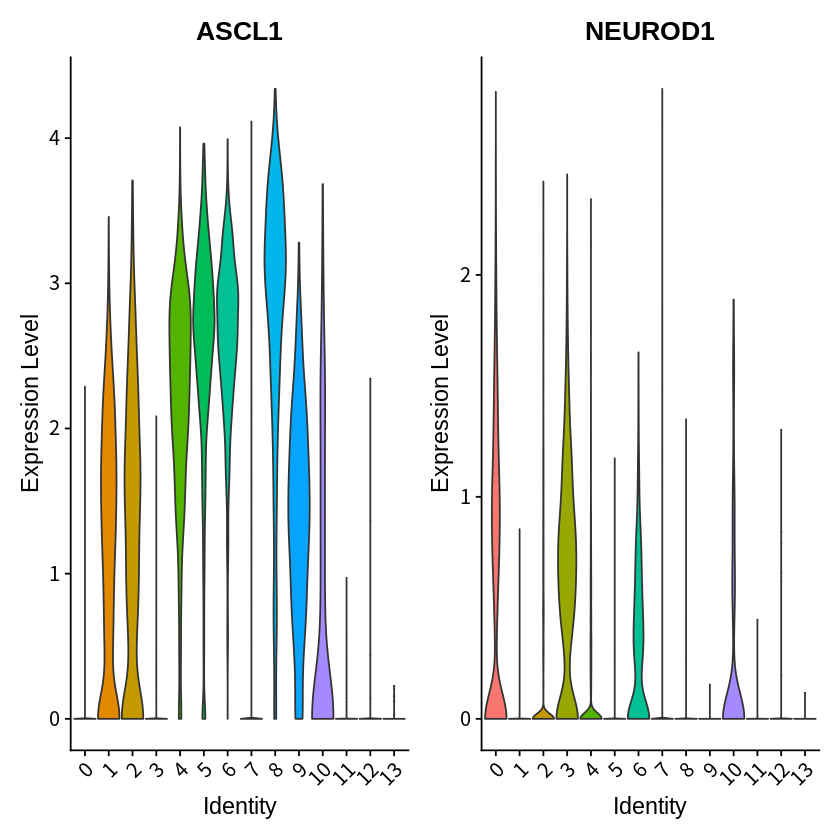

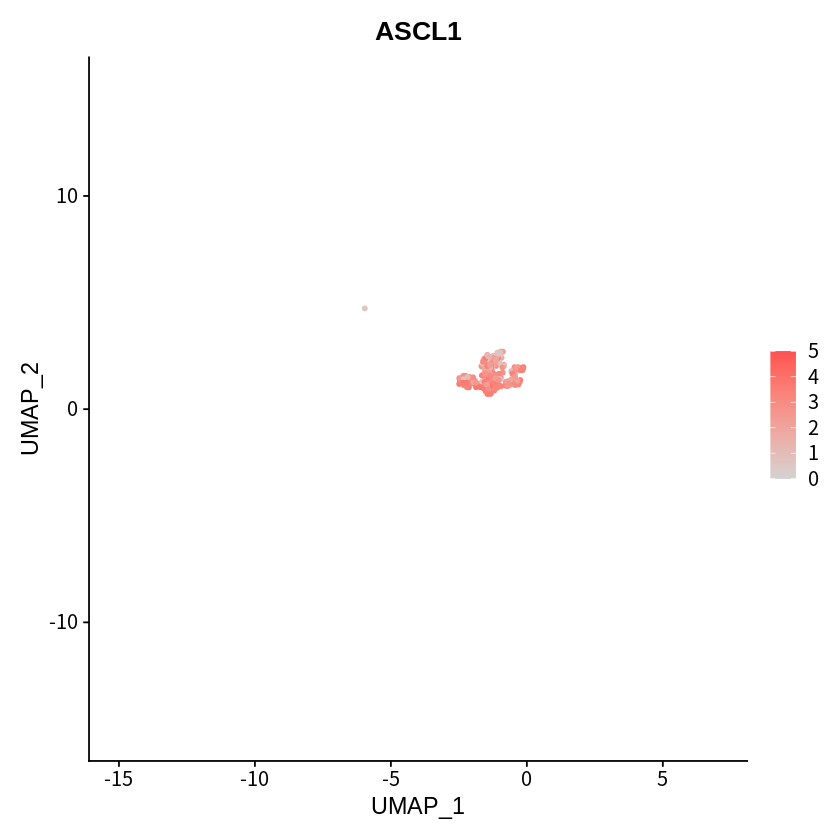

In [61]:
VlnPlot(SCLC.tumor,features = c("ASCL1","NEUROD1"),pt.size=0,group.by="seurat_clusters") 

# FeaturePlot(subset(SCLC.tumor,subset=orig.ident=="S5"), features = c("NEUROD1"), min.cutoff = "q2")+scale_color_gradientn( colours = c('lightgrey', '#FF5151'),  limits = c(0, 2)) +  scale_x_continuous(limits = c(-15, 7))+  scale_y_continuous(limits = c(-15, 15))

FeaturePlot(subset(SCLC.tumor,subset=orig.ident=="S7"), features = c("ASCL1"), min.cutoff = "q2")+scale_color_gradientn( colours = c('lightgrey', '#FF5151'),  limits = c(0, 5)) +  scale_x_continuous(limits = c(-15, 7))+  scale_y_continuous(limits = c(-15, 15))

# VlnPlot(SCLC.tumor,features = c("ASCL1"),pt.size=0,group.by="seurat_clusters") 
# VlnPlot(SCLC.tumor,features = c("NEUROD1"),pt.size=0,group.by="seurat_clusters") 

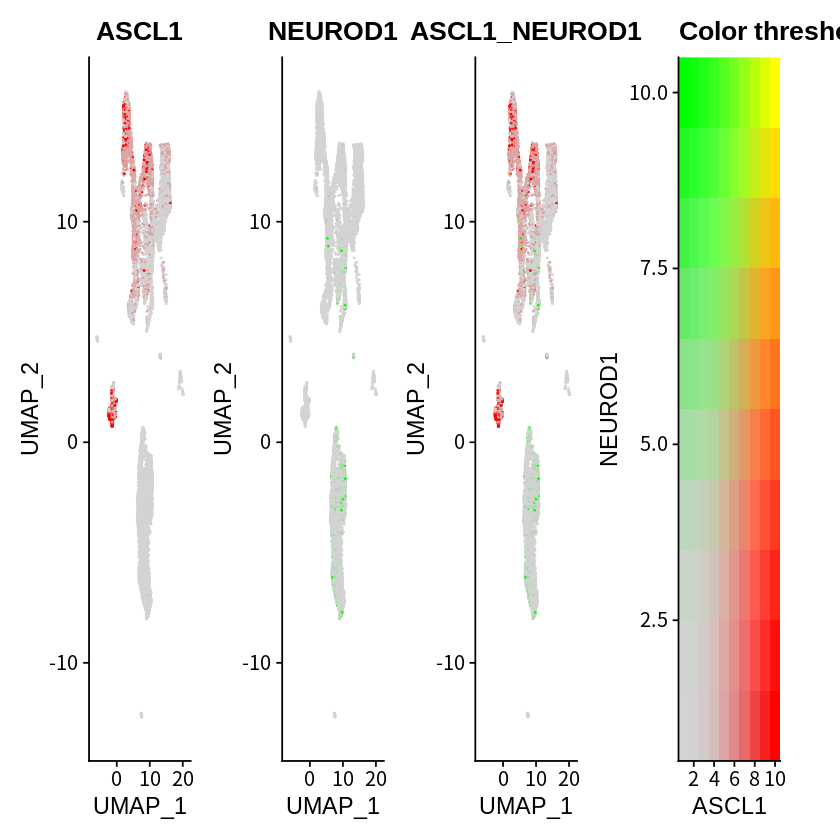

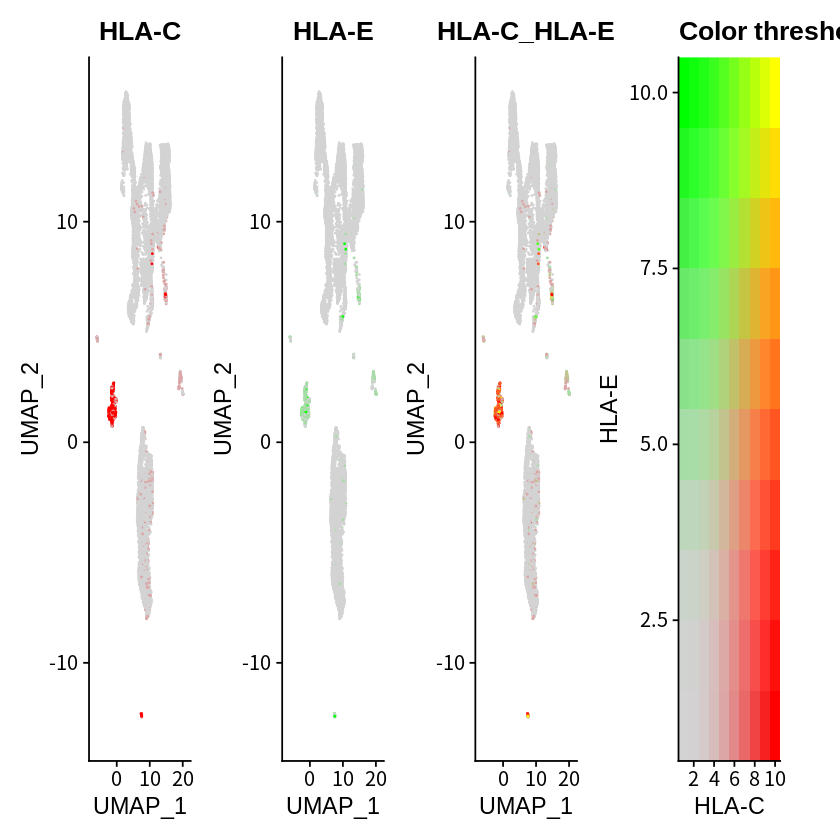

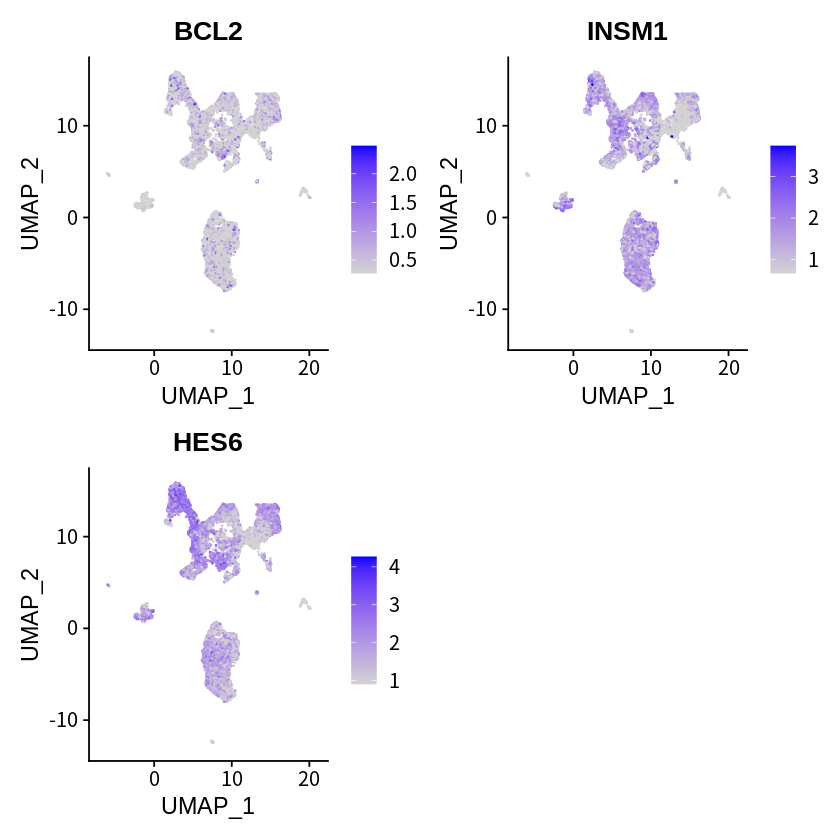

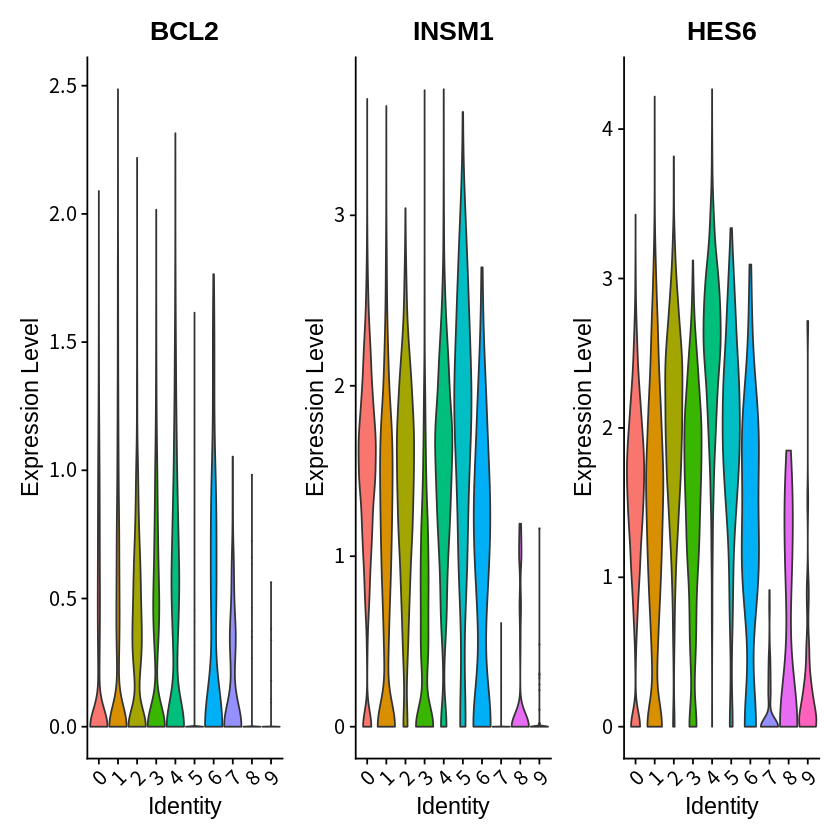

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



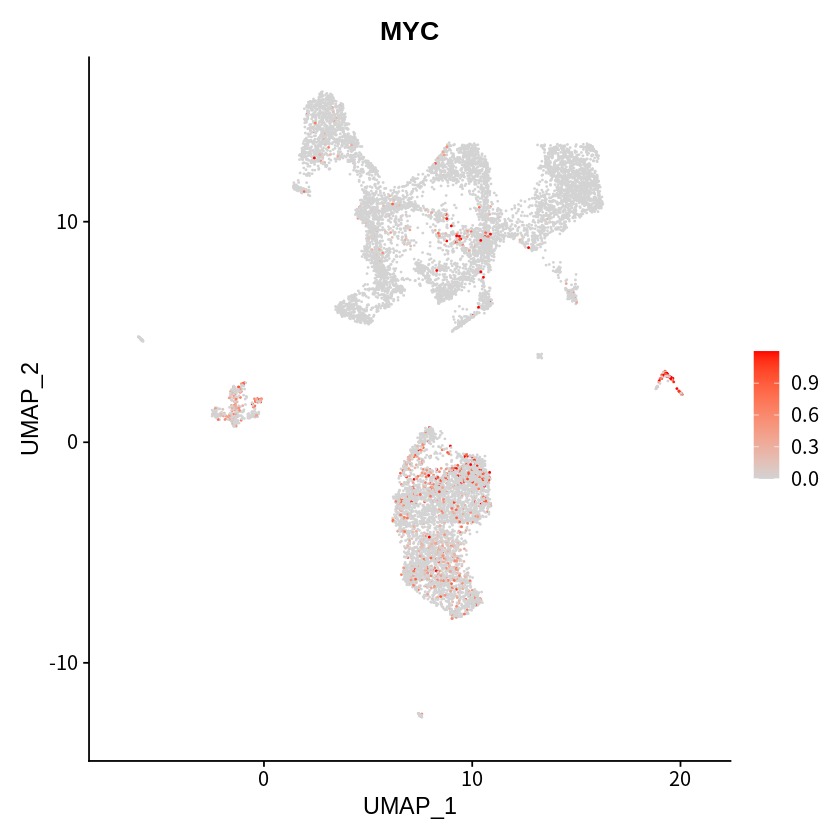

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



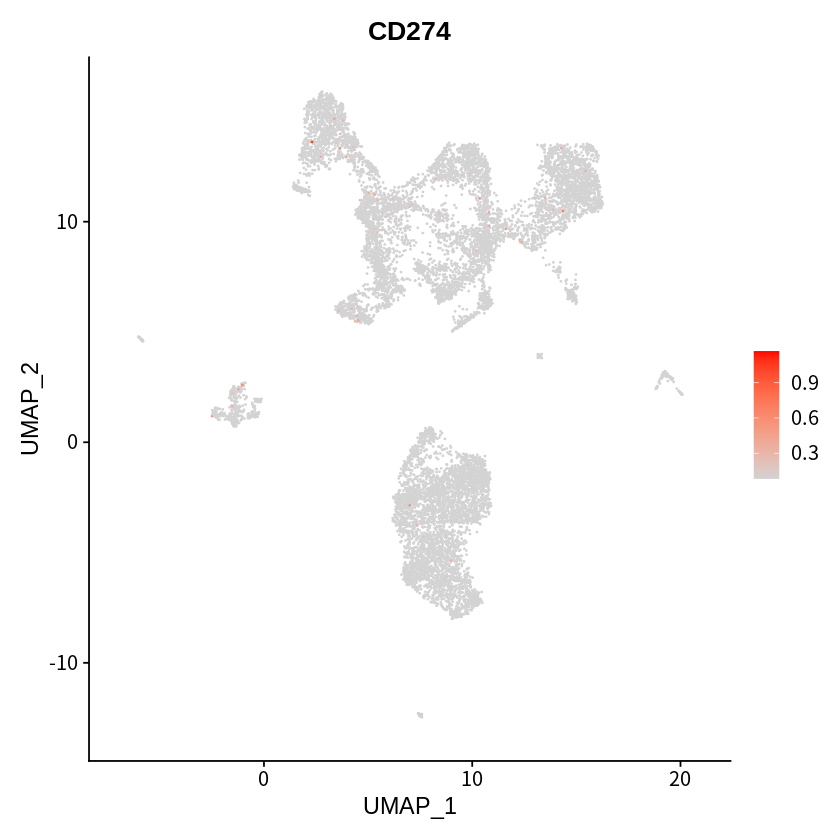

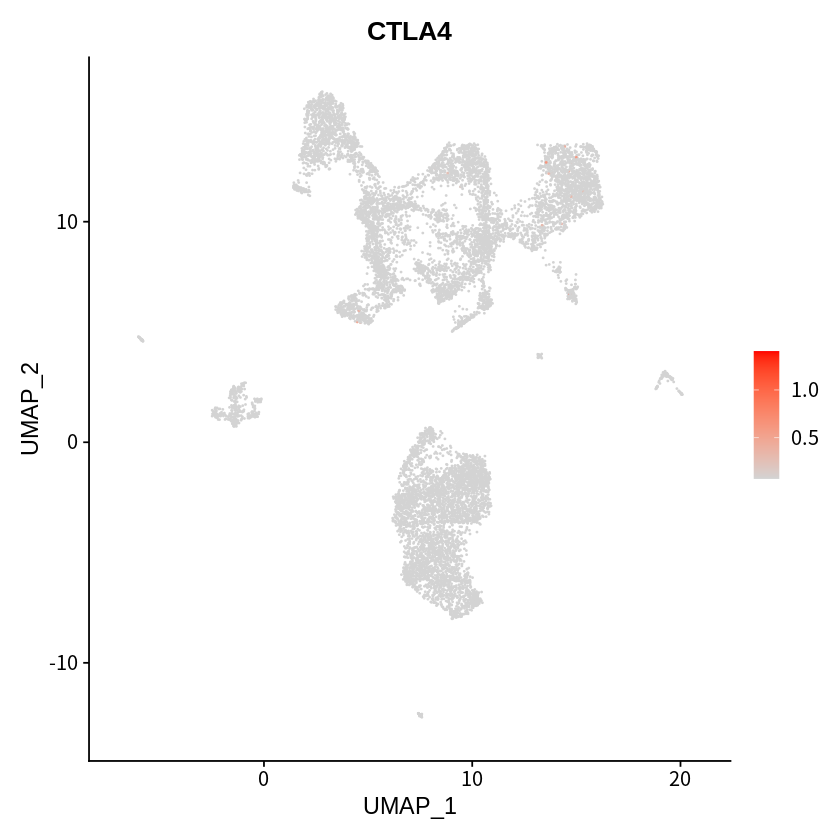

In [37]:
FeaturePlot(SCLC.tumor, features = c("ASCL1", "NEUROD1" ), min.cutoff = "q9",blend=T)
FeaturePlot(SCLC.tumor, features = c("HLA-C", "HLA-E" ), min.cutoff = "q9",blend=T)
FeaturePlot(SCLC.tumor, features = c("BCL2","INSM1","HES6" ), min.cutoff = "q9")
VlnPlot(SCLC.tumor, features = c("BCL2","INSM1","HES6" ),pt.size=0)

library(ggplot2)
FeaturePlot(SCLC.tumor, features = c("MYC" ), cols=c("lightgrey","red"), max.cutoff=1.2) 

FeaturePlot(SCLC.tumor, features = c("CD274"), min.cutoff = "q1")+scale_color_gradientn( colours = c('lightgrey', 'red'))
FeaturePlot(SCLC.tumor, features = c("CTLA4"), min.cutoff = "q1")+scale_color_gradientn( colours = c('lightgrey', 'red'))

In [64]:
table(SCLC.tumor$orig.ident,SCLC.tumor$seurat_clusters)
table(SCLC.tumor$seurat_clusters)

    
        0    1    2    3    4    5    6    7    8    9   10   11   12   13
  S1    0   10  402    0  353    1  693   13    0    2    1   78    4   30
  S2    0 1650  315    0  238    2    3    9    0  327   43    8    1    5
  S4    0    0  300    0  731 1143    1  138    0    0   13    0    3    1
  S5    0    0    2    0   27    0   34    1    0    0    8    0    0    2
  S6 2531    4  466 1493   56    5    0  216    0    1   90    0   34    0
  S7    0    0   22    0    0    0    0    2  348    0    3    0    1    1


   0    1    2    3    4    5    6    7    8    9   10   11   12   13 
2531 1664 1507 1493 1405 1151  731  379  348  330  158   86   43   39 

### CSC cluster percentage

In [62]:
head(SCLC.tumor@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,sample,percent.HB,RNA_snn_res.0.8,seurat_clusters,celltype,RNA_snn_res.0.1,RNA_snn_res.0.2,RNA_snn_res.0.3
,<chr>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
S1_AAACGCTCATTAGGCT-1,S1,38063.56,6485,9.2669949,S1,0,12,6,tumor,1,2,6
S1_AAACGCTGTACGACAG-1,S1,22451.61,4464,11.2228054,S1,0,20,11,tumor,7,8,11
S1_AAACGCTGTTGTGCCG-1,S1,37911.32,5923,13.1976097,S1,0,12,6,tumor,1,2,6
S1_AAAGAACTCAACACCA-1,S1,21211.40,4539,0.8056408,S1,0,0,2,tumor,1,2,2
S1_AAAGGATAGATTAGAC-1,S1,47046.12,6448,3.9217880,S1,0,1,2,tumor,1,2,2
S1_AAAGGGCCAGAAATCA-1,S1,17503.04,3812,11.8063603,S1,0,12,6,tumor,1,2,6


In [ ]:
# t(table(SCLC.tumor@meta.data[,c("orig.ident","seurat_clusters")])/rowSums( table(SCLC.tumor@meta.data[,c("orig.ident","seurat_clusters")])))

In [66]:
t(table(SCLC.tumor@meta.data[,c("orig.ident","seurat_clusters")])/rowSums( table(SCLC.tumor@meta.data[,c("orig.ident","seurat_clusters")])))[c(12,14),]

               orig.ident
seurat_clusters           S1           S2           S4           S5
             11 0.0491493384 0.0030757401 0.0000000000 0.0000000000
             13 0.0189035917 0.0019223376 0.0004291845 0.0270270270
               orig.ident
seurat_clusters           S6           S7
             11 0.0000000000 0.0000000000
             13 0.0000000000 0.0026525199

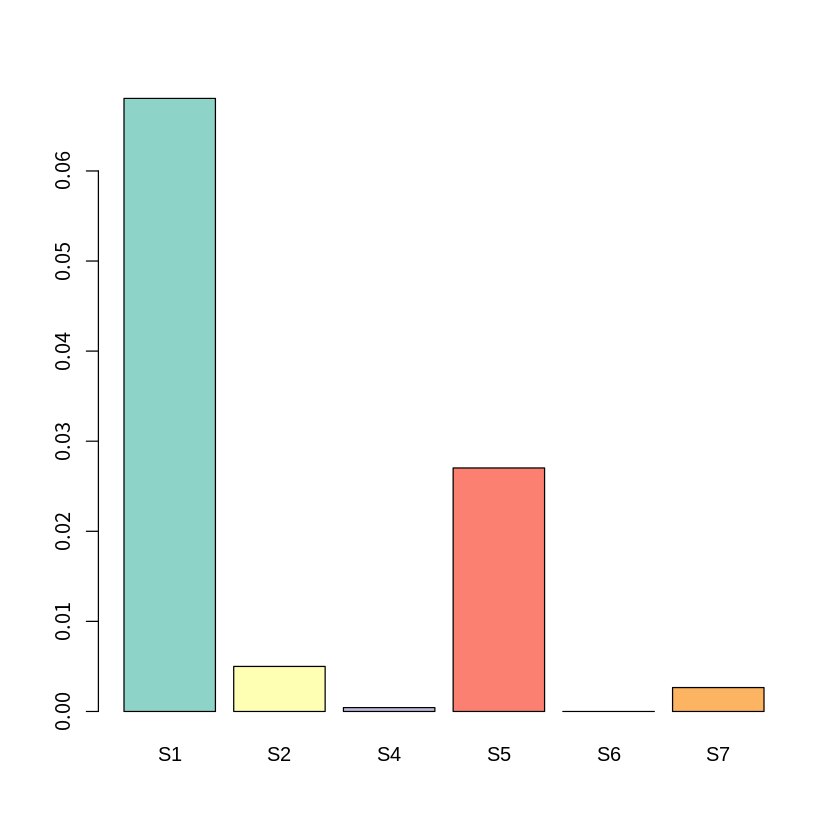

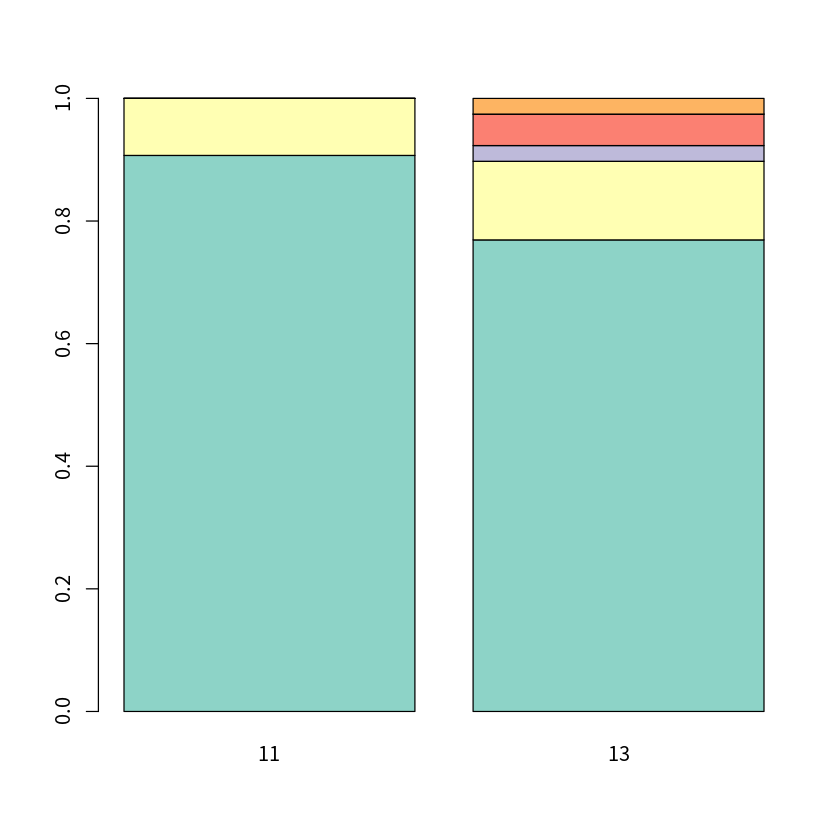

In [70]:

library(RColorBrewer)

barplot(colSums(t(table(SCLC.tumor@meta.data[,c("orig.ident","seurat_clusters")])/rowSums( table(SCLC.tumor@meta.data[,c("orig.ident","seurat_clusters")])))[c(12,14),]),col= brewer.pal(n = 7, name = "Set3"))

barplot(t(as.matrix(t(table(SCLC.tumor@meta.data[,c("orig.ident","seurat_clusters")]))/colSums(table(SCLC.tumor@meta.data[,c("orig.ident","seurat_clusters")])))[c(12,14),]),col= brewer.pal(n = 7, name = "Set3"))


In [ ]:
FeatureScatter(subset(SCLC.tumor,subset=seurat_clusters=="3"),feature1="ASCL1",feature2="NEUROD1")
FeaturePlot(subset(SCLC.tumor,subset= ASCL1 > 1 & NEUROD1 > 0.75), features = c("ASCL1", "NEUROD1" ),label=T,)

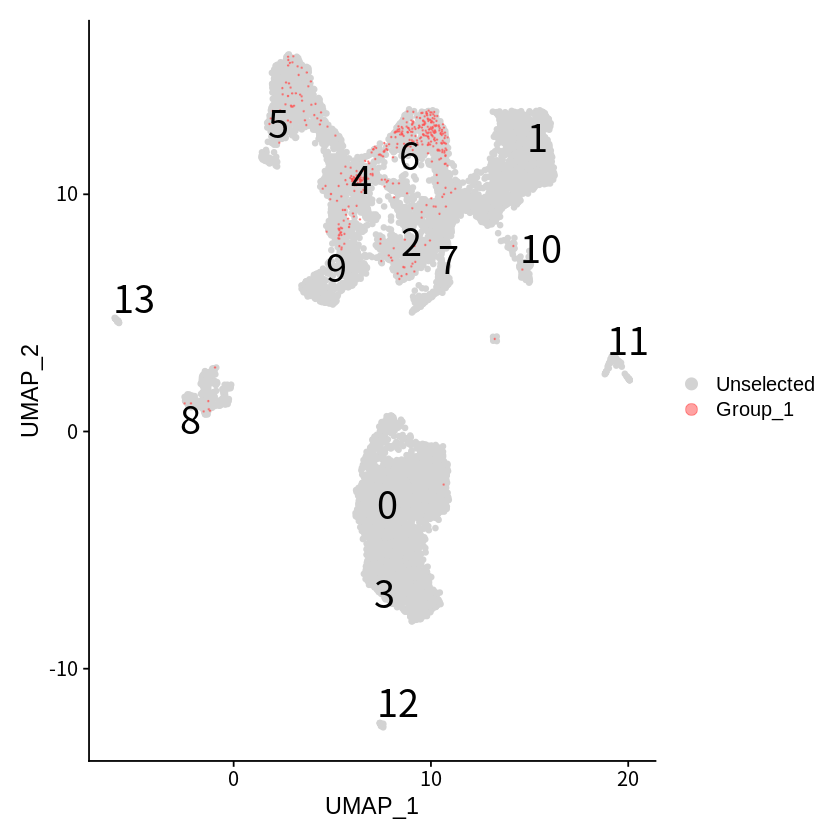

In [113]:
WhichCells(object = SCLC.tumor, expression = ASCL1 > 2.1738 & NEUROD1 > 0.4784)->select_cells

DimPlot(SCLC.tumor, cols="lightgrey", cells.highlight= select_cells, cols.highlight="#FF515188", pt.size = 1.2,
                                     sizes.highlight=0.1,label=T,label.size = 8,repel = T)

In [71]:
ls()
table(SCLC.tumor$seurat_clusters)

[1] "SCLC.filter"  "SCLC.tumor"   "select_cells"


   0    1    2    3    4    5    6    7    8    9   10   11   12   13 
2531 1664 1507 1493 1405 1151  731  379  348  330  158   86   43   39 

In [74]:
# Sankey diagram showiong the correspondence between samples and classifications of SCLC subtypes 
table(SCLC.tumor@meta.data[,c("orig.ident","seurat_clusters")]) ->table_tumor_cluster
table_tumor_cluster

          seurat_clusters
orig.ident    0    1    2    3    4    5    6    7    8    9   10   11   12
        S1    0   10  402    0  353    1  693   13    0    2    1   78    4
        S2    0 1650  315    0  238    2    3    9    0  327   43    8    1
        S4    0    0  300    0  731 1143    1  138    0    0   13    0    3
        S5    0    0    2    0   27    0   34    1    0    0    8    0    0
        S6 2531    4  466 1493   56    5    0  216    0    1   90    0   34
        S7    0    0   22    0    0    0    0    2  348    0    3    0    1
          seurat_clusters
orig.ident   13
        S1   30
        S2    5
        S4    1
        S5    2
        S6    0
        S7    1

In [78]:
cbind(rowSums(table_tumor_cluster[,c("0","3")]),rowSums(table_tumor_cluster[,c("1","2","4","5","8","9")]),rowSums(table_tumor_cluster[,c("6","10")]),rowSums(table_tumor_cluster[,c("11","12","13")]))-> table_tumor_cluster2

table_tumor_cluster2/rowSums(table_tumor_cluster2)-> table_tumor_cluster3
table_tumor_cluster2
table_tumor_cluster3

S1,0,768,694,112
S2,0,2532,46,14
S4,0,2174,14,4
S5,0,29,42,2
S6,4024,532,90,34
S7,0,370,3,2


S1,0.0000000,0.4879288,0.440914867,0.071156290
S2,0.0000000,0.9768519,0.017746914,0.005401235
S4,0.0000000,0.9917883,0.006386861,0.001824818
S5,0.0000000,0.3972603,0.575342466,0.027397260
S6,0.8598291,0.1136752,0.019230769,0.007264957
S7,0.0000000,0.9866667,0.008000000,0.005333333


In [79]:
# plot
library(reshape2)
library(ggalluvial)
colnames(table_tumor_cluster3)<-c("N+","A+","A+N+","A-N-")
table_tumor_cluster3

,N+,A+,A+N+,A-N-
S1,0.0000000,0.4879288,0.440914867,0.071156290
S2,0.0000000,0.9768519,0.017746914,0.005401235
S4,0.0000000,0.9917883,0.006386861,0.001824818
S5,0.0000000,0.3972603,0.575342466,0.027397260
S6,0.8598291,0.1136752,0.019230769,0.007264957
S7,0.0000000,0.9866667,0.008000000,0.005333333


In [80]:
melt(table_tumor_cluster3)-> table_tumor_cluster4

factor(table_tumor_cluster4[,2],levels=c("A-N-","A+","A+N+","N+"))-> table_tumor_cluster4[,2]

In [81]:
table_tumor_cluster4

Var1,Var2,value
<fct>,<fct>,<dbl>
S1,N+,0.000000000
S2,N+,0.000000000
S4,N+,0.000000000
S5,N+,0.000000000
S6,N+,0.859829060
S7,N+,0.000000000
S1,A+,0.487928844
S2,A+,0.976851852
S4,A+,0.991788321


Warning message:
“The parameter `infer.label` is deprecated.
Use `aes(label = after_stat(stratum))`.”


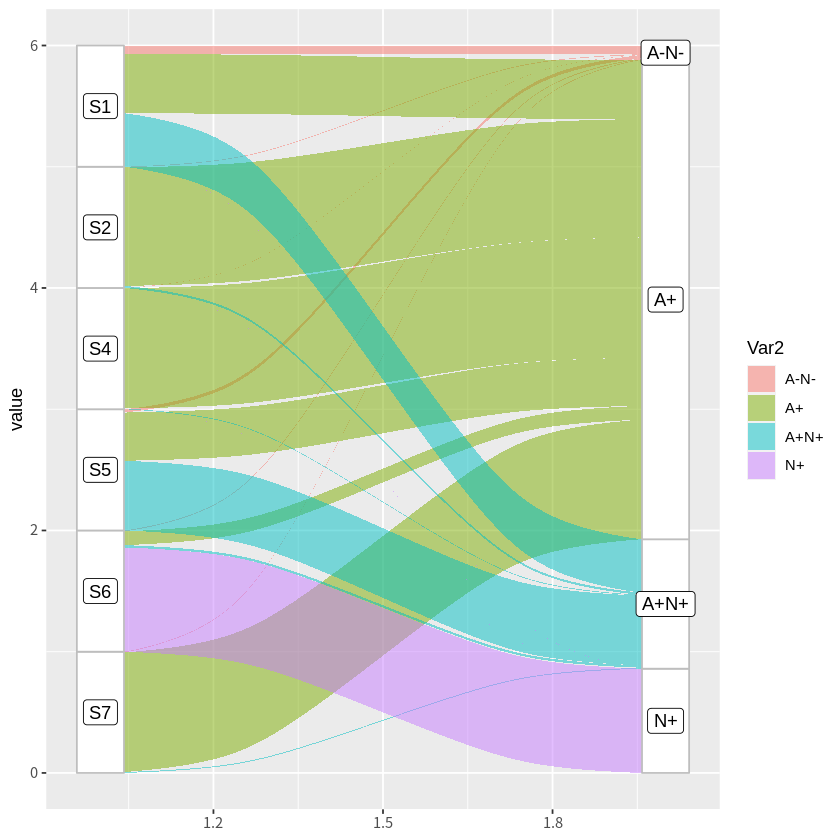

In [183]:
ggplot(table_tumor_cluster4,
       aes(y=value,axis1=Var1, axis2=Var2)) + geom_alluvium(aes(fill=Var2),width=1/12) +  
       geom_stratum(width = 1/12, color = "grey",fill="white") +   
       geom_label(stat = "stratum", infer.label = TRUE) 


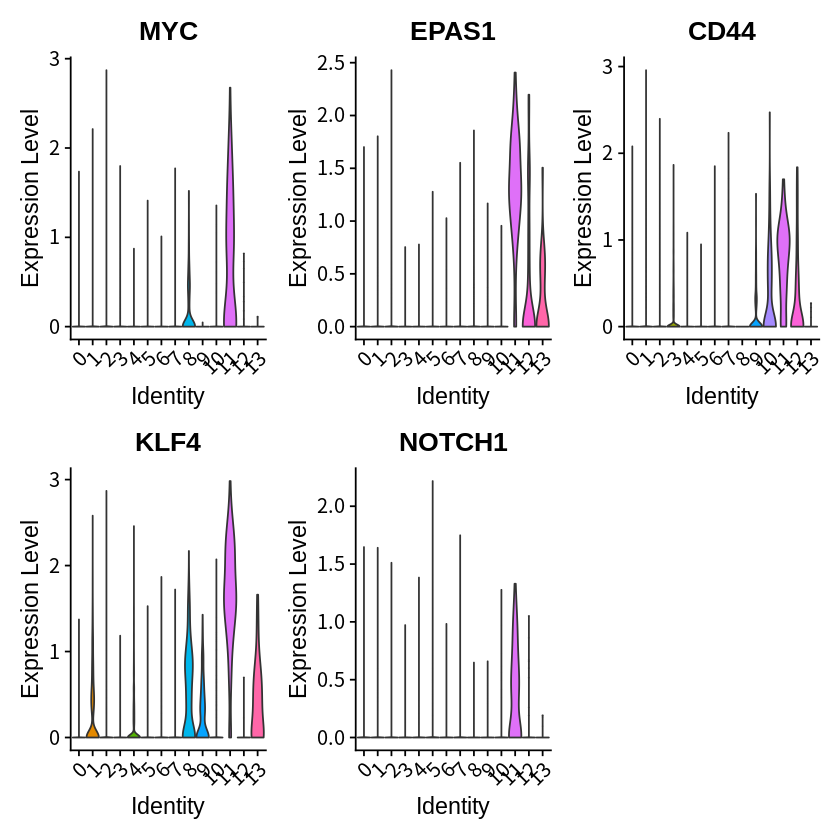

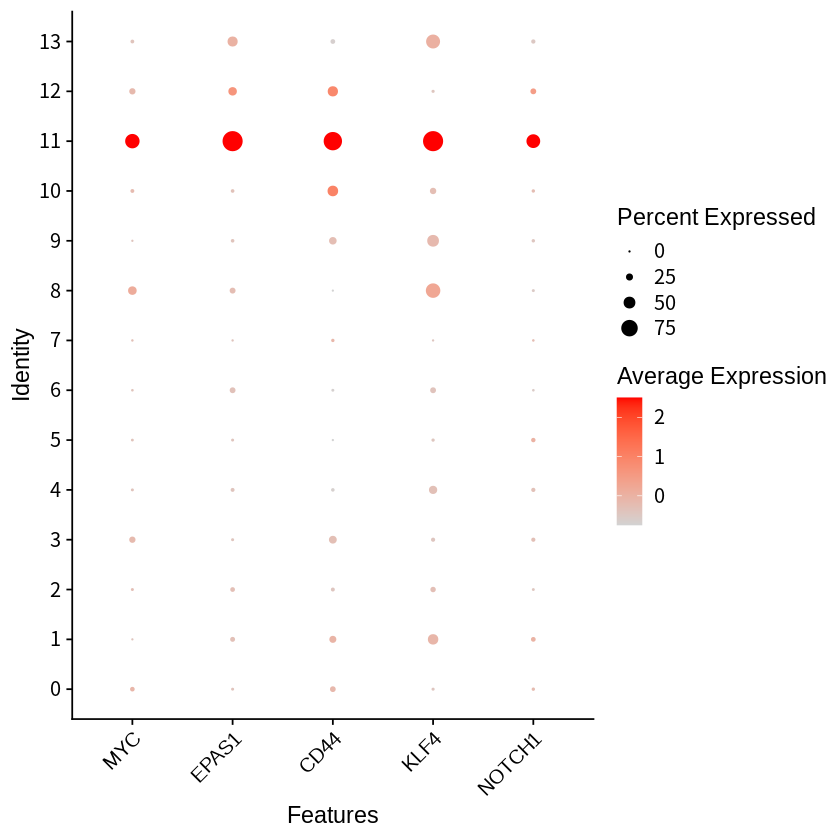

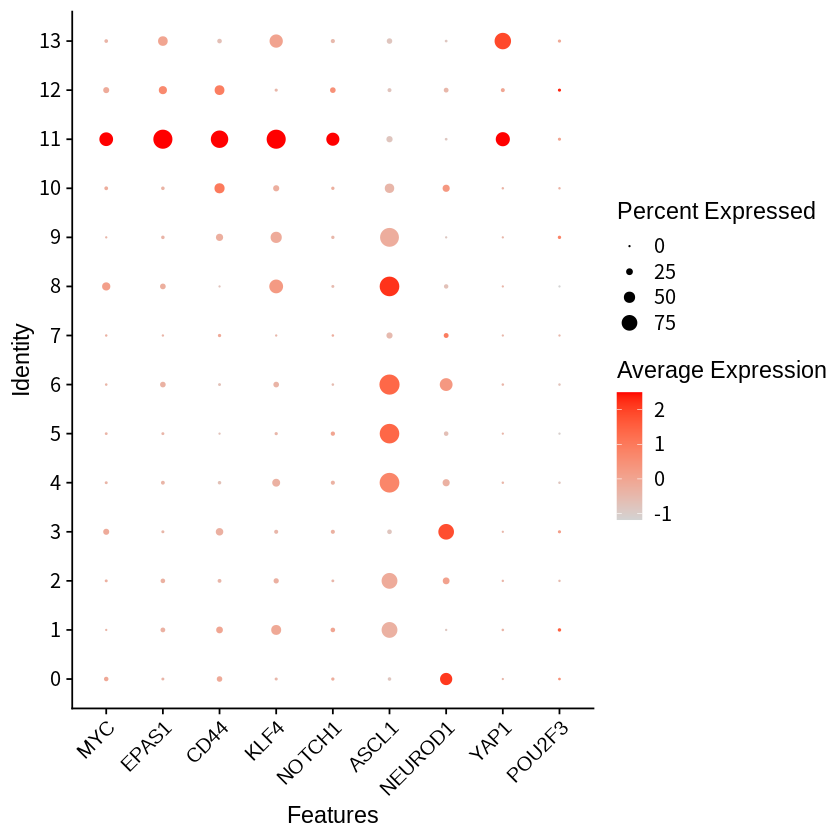

In [83]:
VlnPlot(SCLC.tumor, features = c("MYC", "EPAS1","CD44","KLF4" ,"NOTCH1"),pt.size=0)

DotPlot(SCLC.tumor, features =c("MYC", "EPAS1","CD44","KLF4","NOTCH1") ,cols = c("lightgrey", "red"), dot.scale = 5) + RotatedAxis()

DotPlot(SCLC.tumor, features =c("MYC", "EPAS1","CD44","KLF4","NOTCH1","ASCL1","NEUROD1","YAP1","POU2F3") ,cols = c("lightgrey", "red"), dot.scale = 5) + RotatedAxis()

### CSC genes and signatures

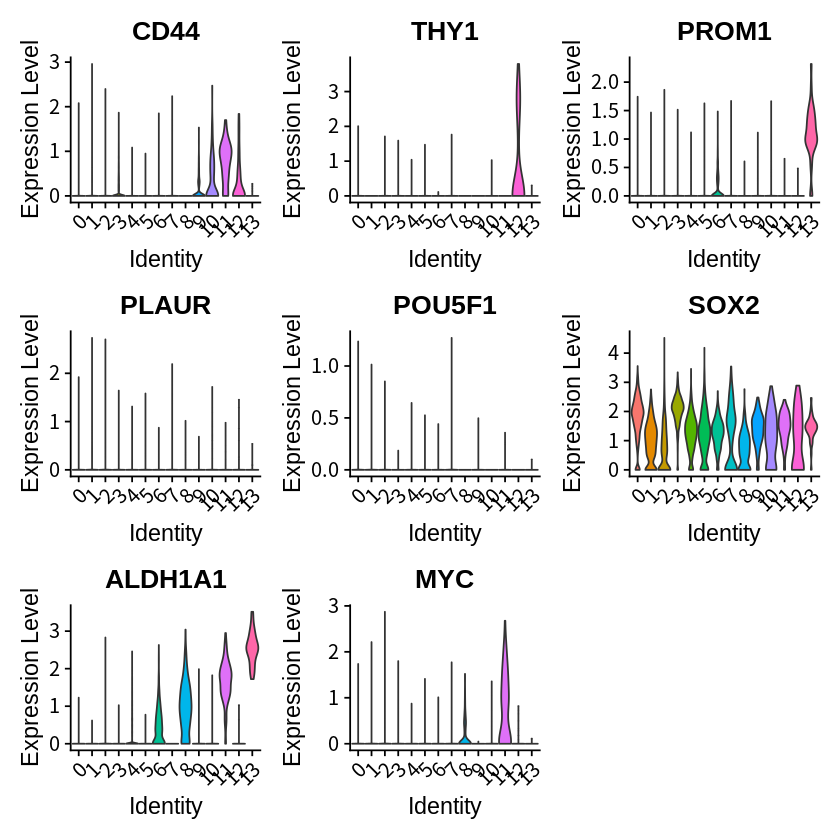

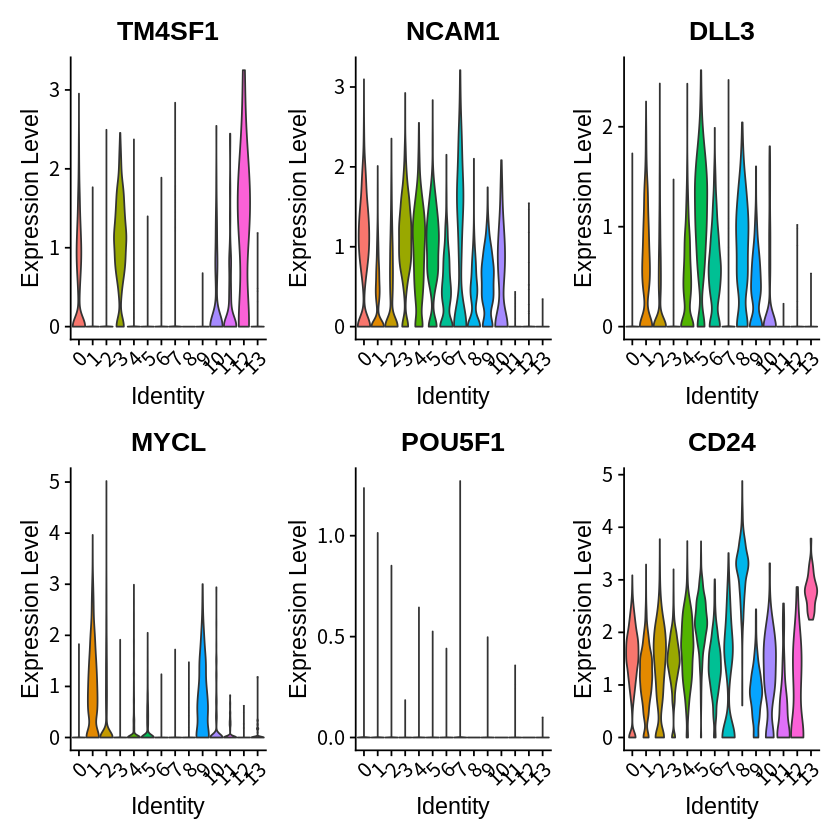

In [84]:
####### CSC genes and signatures
VlnPlot(SCLC.tumor,features = c("CD44","THY1","PROM1","PLAUR","POU5F1","SOX2","ALDH1A1","MYC"),pt.size=0)
VlnPlot(SCLC.tumor,features = c("TM4SF1","NCAM1","DLL3","MYCL","POU5F1","CD24"),pt.size=0)

In [93]:
# markers for cluster 11

# cluster11.markers <- FindMarkers(SCLC.tumor, ident.1 = 11, min.pct = 0.25, logfc.threshold = 0.25)
# write.csv(cluster11.markers, file="table_out/3_cluster11.markers.csv",quote=F)


In [94]:
# markers for cluster 13

# cluster13.markers <- FindMarkers(SCLC.tumor, ident.1 = 13, min.pct = 0.25, logfc.threshold = 0.25)
# write.csv(cluster13.markers, file="table_out/3_cluster13.markers.csv",quote=F)


In [96]:
#  differentially expressed genes (DEGs) between drug sensitive and resistant patients

# drug.res.markers <- FindMarkers(SCLC.tumor, only.pos = F, ident.1=c("S1","S2"),ident.2 = c("S4","S5","S7"),min.pct = 0.25, logfc.threshold = 0.25, group.by= "orig.ident")
# write.csv(drug.res.markers, file="table_out/3_drug.res.markers.csv",quote=F)


In [ ]:
# save sclc tumor cells without S3 sample
# save(SCLC.tumor, file = "data_out/3.SCLC.tumor.no.S3.rdata")

### GSEA analysis comparing Gene Ontology (GO) pathways in either A+ or N + tumor cells with A+N+ tumor cells 

In [ ]:
cbind(rowSums(table_tumor_cluster[,c("0","3")]),rowSums(table_tumor_cluster[,c("1","2","4","5","8","9")]),rowSums(table_tumor_cluster[,c("6","10")]),rowSums(table_tumor_cluster[,c("11","12","13")]))-> table_tumor_cluster2
colnames(table_tumor_cluster3)<-c("N+","A+","A+N+","A-N-")


In [115]:
# DEGs of N + v.s. A+N+ subpopulation
# ==========================
NEUROD1.markers <- FindMarkers(SCLC.tumor, only.pos = F, ident.1=c(0,3),ident.2 = c(6,10),
                                min.pct = 0.01, logfc.threshold = 0, group.by= "seurat_clusters")
head(NEUROD1.markers)
# write.csv(NEUROD1.markers, file="table_out/3_NEUROD1.markers.csv",quote=F)


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ESPN,0,-0.6305538,0.025,0.637,0
RAB3B,0,-1.0976260,0.209,0.828,0
TMEM61,0,-0.6654242,0.071,0.636,0
RPS27,0,-1.5947132,0.998,1.000,0
RYR2,0,-0.9343335,0.008,0.666,0
SIX3,0,-0.8094511,0.094,0.750,0


In [116]:
# DEGs of A + v.s. A+N+ subpopulation
# ==========================
ASCL1.markers <- FindMarkers(SCLC.tumor, only.pos = F, ident.1=c(1,2,4,5,8,9),ident.2 = c(6,10),
                                min.pct = 0.01, logfc.threshold = 0, group.by= "seurat_clusters")
head(ASCL1.markers)
# write.csv(ASCL1.markers, file="table_out/3_ASCL1.markers.csv",quote=F)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RYR2,0,-0.8177477,0.087,0.666,0
MSN,0,-0.7210686,0.182,0.780,0
SLC18A1,0,-0.3655134,0.056,0.471,0
LRRC4C,0,-0.4620171,0.066,0.497,0
FERMT3,0,-0.5678731,0.102,0.602,0
COL17A1,0,-0.6982549,0.060,0.552,0


In [117]:
dim(NEUROD1.markers);dim(ASCL1.markers);

[1] 17002     5

[1] 17118     5

In [122]:
### order genes 
# ==================================
  geneList= ASCL1.markers$avg_log2FC
  names(geneList)= toupper(rownames(ASCL1.markers))
  geneList=sort(geneList,decreasing = T)
  head(geneList);length(geneList)


WFDC2    PLCG2      AVP   PABPC4    TOP2A    GSTP1 
2.257561 2.051477 1.816895 1.789804 1.764084 1.604138

[1] 17118

In [123]:
  library(ggplot2)
  library(clusterProfiler)
  library(org.Hs.eg.db)

In [124]:
  gobp <- "data_input/gmtfile/c5.go.bp.v7.2.symbols.gmt"
  
  library(GSEABase)
  geneset <- read.gmt(gobp)
  length(unique(geneset$term))

[1] 7573

In [125]:
  # run GSEA
  # ==================================
  egmt <- GSEA(geneList, TERM2GENE=geneset,
               minGSSize = 10,
               pvalueCutoff = 1,
               pAdjustMethod = "BH",
               verbose=TRUE)

  gsea_results_df <- egmt@result

# write.csv(gsea_results_df,file = 'table_out/3.gsea_results_df_of_ASCL1.markers.csv')


preparing geneSet collections...

GSEA analysis...

Warning message in fgseaMultilevel(...):
“For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation.”
leading edge analysis...

done...



## visualize by scatter plot and heatmap

In [152]:
read.csv("table_out/3.gsea_results_df_of_ASCL1.markers.csv", row.names = 1) ->ASCL1
read.csv("table_out/3.gsea_results_df_of_NEUROD1.markers.csv", row.names = 1) ->Neurod1


In [ ]:
# head(ASCL1);head(Neurod1);
dim(ASCL1);dim(Neurod1);

In [154]:
merge(Neurod1,ASCL1,by.x=1,by.y=1)->pathway_merge

In [ ]:
# head(pathway_merge);dim(pathway_merge);

In [156]:
pathway_merge[,c("NES.x","NES.y")]->pathway_merge2
rownames(pathway_merge2)<-pathway_merge[,1]

In [157]:
c("GO_CELL_CELL_JUNCTION_ORGANIZATION","GO_CELL_REDOX_HOMEOSTASIS","GO_EXTRINSIC_APOPTOTIC_SIGNALING_PATHWAY")->p1
c("GO_COMPLEMENT_ACTIVATION","GO_TRANSLATIONAL_INITIATION","GO_PHAGOCYTOSIS_RECOGNITION")->p2
c("GO_ANTIBACTERIAL_HUMORAL_RESPONSE","GO_EPIDERMAL_CELL_DIFFERENTIATION","GO_EPIDERMIS_DEVELOPMENT")->p3
c("GO_MEIOTIC_CELL_CYCLE","GO_MEIOTIC_CELL_CYCLE_PROCESS","GO_CELL_CYCLE_G1_S_PHASE_TRANSITION","GO_REGULATION_OF_DNA_REPLICATION")->p4
c("GO_CELL_CELL_SIGNALING_BY_WNT","GO_REGULATION_OF_WNT_SIGNALING_PATHWAY","GO_CANONICAL_WNT_SIGNALING_PATHWAY","GO_NON_CANONICAL_WNT_SIGNALING_PATHWAY")->wnt
c("GO_TRANSFORMING_GROWTH_FACTOR_BETA_RECEPTOR_SIGNALING_PATHWAY","GO_RESPONSE_TO_TRANSFORMING_GROWTH_FACTOR_BETA","GO_DEVELOPMENTAL_CELL_GROWTH")->growth

In [158]:
rep("#00000020",dim(pathway_merge2)[1])->colors
names(colors)<-rownames(pathway_merge2)
colors[p1]<-"brown"
colors[p2]<-"red"
colors[p3]<-"blue"
colors[p4]<-"green"
colors[wnt]<-"orange"
colors[growth]<-"purple"

In [159]:
data.frame(pathway_merge2,colors=factor(colors))-> pathway_merge_all
subset(pathway_merge_all, colors != "#00000020")->colors_heatmap

In [ ]:
dim(pathway_merge_all); # head(pathway_merge_all)

In [161]:
pathway_merge[which(pathway_merge[,1] %in% c(p1,p2,p3,p4,wnt,growth) ),c("pvalue.x","p.adjust.x","NES.x","pvalue.y","p.adjust.y","NES.y")]-> pathway_merge_heatmap
rownames(pathway_merge_heatmap)<-pathway_merge[rownames(pathway_merge_heatmap),1]
pathway_merge_heatmap[c(p1,p2,p3,wnt,p4,growth), ]-> pathway_merge_heatmap1.2

In [ ]:
dim(pathway_merge_heatmap1.2)
# pathway_merge_heatmap1.2

In [163]:
library(ggplot2)
library(scales)
colnames(pathway_merge_all)<-c("en1","en2","colors")
sizes=rep(0.5,dim(pathway_merge_all)[1])
sizes[which(pathway_merge_all[,3]!="#00000020")]=2
cbind(pathway_merge_all,sizes)-> pathway_merge_all2

In [164]:
head(pathway_merge_all2)

,en1,en2,colors,sizes
,<dbl>,<dbl>,<fct>,<dbl>
GO_2_OXOGLUTARATE_METABOLIC_PROCESS,-0.6755184,-0.6855594,#00000020,0.5
GO_3_PHOSPHOADENOSINE_5_PHOSPHOSULFATE_METABOLIC_PROCESS,-0.9023350,-0.7819948,#00000020,0.5
GO_3_UTR_MEDIATED_MRNA_DESTABILIZATION,-1.2414945,1.4229996,#00000020,0.5
GO_3_UTR_MEDIATED_MRNA_STABILIZATION,0.8645138,1.1201083,#00000020,0.5
GO_ACETYL_COA_BIOSYNTHETIC_PROCESS,0.5548600,1.1994651,#00000020,0.5
GO_ACETYL_COA_BIOSYNTHETIC_PROCESS_FROM_PYRUVATE,0.4986627,1.2668698,#00000020,0.5


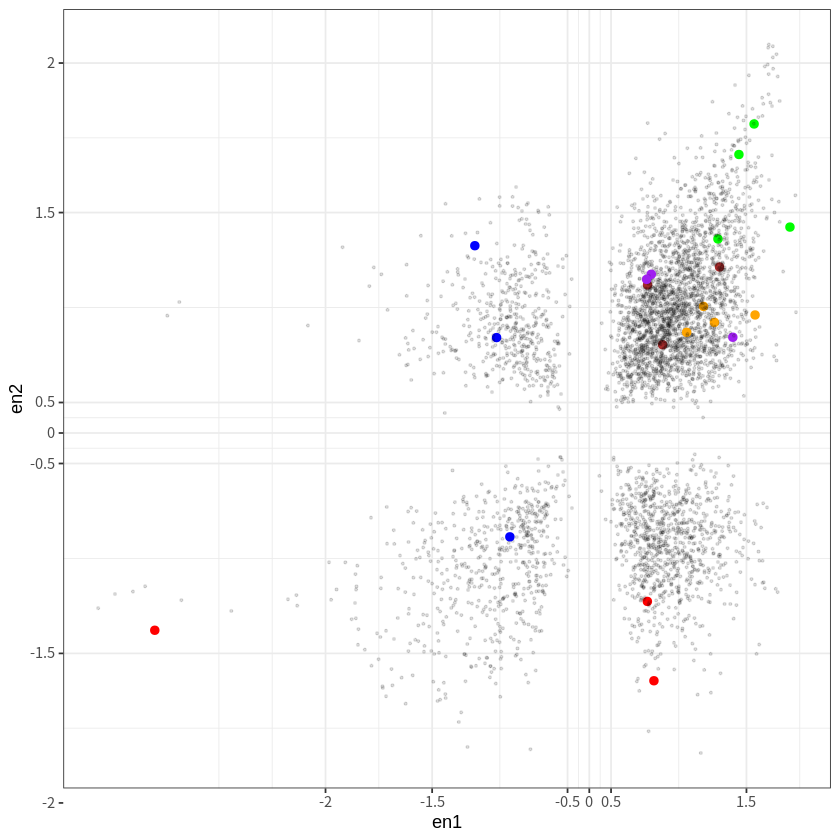

In [165]:
ggplot(pathway_merge_all2,aes(x= en1,y= en2))  + geom_point(color=colors,size=sizes)->sp

tn <- trans_new("logpeps",
                function(x) sign(x)*abs(x)^1.8,
                function(y) sign(y)*abs(y)^1.8)


sp + scale_x_continuous( trans  = tn, breaks = c(-2,-1.5,-0.5,0,0.5,1.5,2),labels= c(-2,-1.5,-0.5,0,0.5,1.5,2)) + scale_y_continuous( trans  = tn, breaks = c(-2,-1.5,-0.5,0,0.5,1.5,2),labels= c(-2,-1.5,-0.5,0,0.5,1.5,2)) + theme_bw()

In [170]:
# apply(pathway_merge_heatmap1.2,1,function(x) c(x[3] * as.numeric(x[1]<0.05 & x[2]<0.25),x[6]*as.numeric(x[4] <0.05 & x[5]<0.25) ))-> pathway_merge_heatmap2
 apply(pathway_merge_heatmap1.2,1,function(x) c(x[3] * as.numeric(x[1]<0.05),x[6]*as.numeric(x[4] <0.05) ))-> pathway_merge_heatmap2  
 pathway_merge_heatmap2

,GO_CELL_CELL_JUNCTION_ORGANIZATION,GO_CELL_REDOX_HOMEOSTASIS,GO_EXTRINSIC_APOPTOTIC_SIGNALING_PATHWAY,GO_COMPLEMENT_ACTIVATION,GO_TRANSLATIONAL_INITIATION,GO_PHAGOCYTOSIS_RECOGNITION,GO_ANTIBACTERIAL_HUMORAL_RESPONSE,GO_EPIDERMAL_CELL_DIFFERENTIATION,GO_EPIDERMIS_DEVELOPMENT,GO_CELL_CELL_SIGNALING_BY_WNT,GO_REGULATION_OF_WNT_SIGNALING_PATHWAY,GO_CANONICAL_WNT_SIGNALING_PATHWAY,GO_NON_CANONICAL_WNT_SIGNALING_PATHWAY,GO_MEIOTIC_CELL_CYCLE,GO_MEIOTIC_CELL_CYCLE_PROCESS,GO_CELL_CYCLE_G1_S_PHASE_TRANSITION,GO_REGULATION_OF_DNA_REPLICATION,GO_TRANSFORMING_GROWTH_FACTOR_BETA_RECEPTOR_SIGNALING_PATHWAY,GO_RESPONSE_TO_TRANSFORMING_GROWTH_FACTOR_BETA,GO_DEVELOPMENTAL_CELL_GROWTH
NES.x,0,0,1.351421,0,-2.639105,0.000000,0,0,0,1.256134,0,1.32171,1.545122,1.459638,1.540109,1.342134,1.718084,0,0,1.426262
NES.y,0,0,0.000000,0,-1.410339,-1.600701,0,0,0,0.000000,0,0.00000,0.000000,1.708137,1.809734,1.397513,1.444346,0,0,0.000000


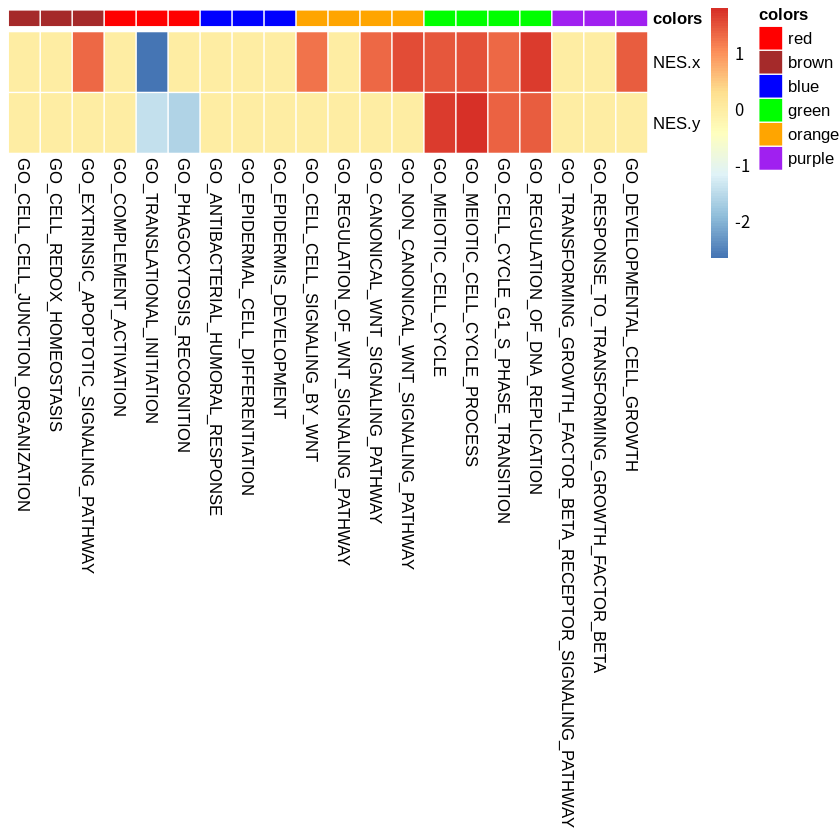

In [171]:
list_colors<-list(colors=c(red="red", brown="brown", blue="blue", green="green", orange="orange", purple="purple"))
library(pheatmap)
pheatmap(pathway_merge_heatmap2,cluster_rows=F,cluster_cols=F,border_color="white",annotation_col= data.frame(colors_heatmap[,-1:-2,F]),annotation_colors= list_colors)

## expression of MHC class I related genes 

In [ ]:
# load("data_out/3.SCLC.tumor.no.S3.rdata")

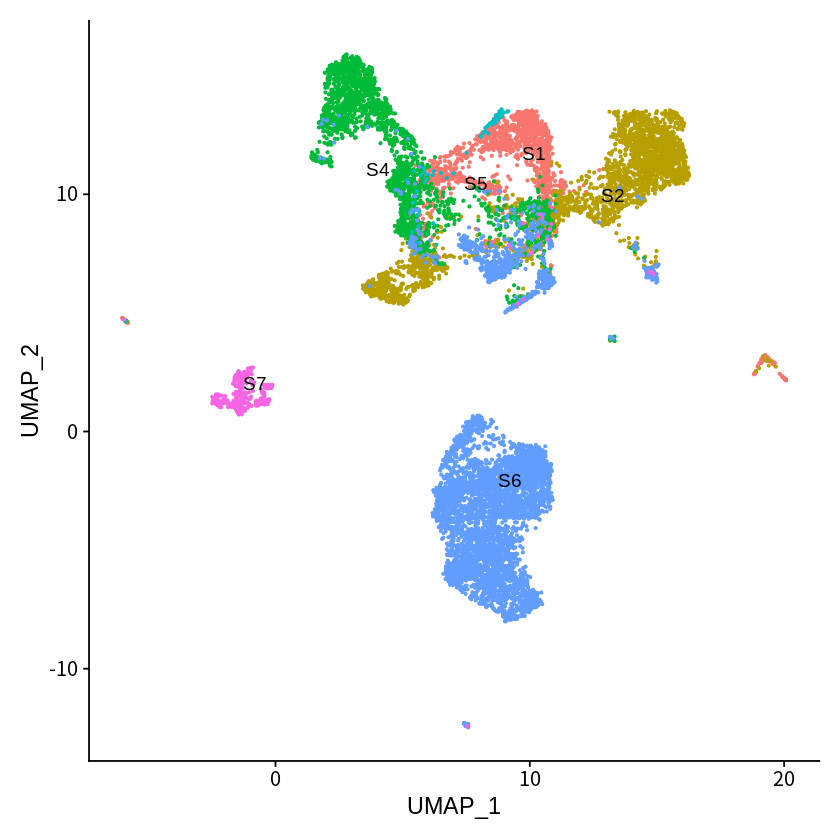

In [173]:
Idents(SCLC.tumor)<- SCLC.tumor$orig.ident
DimPlot(SCLC.tumor, reduction = "umap", repel=T,label = TRUE, pt.size = 0.5) + NoLegend()

In [174]:
c("B2M","CALR","CD207","CD36","CHUK","CLEC4A","CYBA","CYBB","FCER1G","FCGR1A","FCGR1B","HLA-E","HLA-F","HLA-G","HLA-H","IFI30","IKBKB",
  "IKBKG","ITGAV","ITGB5","LNPEP","NCF1","NCF2","NCF4","PDIA3","PSMA1","PSMA2","PSMA3","PSMA4","PSMA5","PSMA6","PSMA7","PSMA8","PSMB1",
  "PSMB10","PSMB11","PSMB2","PSMB3","PSMB4","PSMB5","PSMB6","PSMB7","PSMB8","PSMB9","PSMC1","PSMC2","PSMC3","PSMC4","PSMC5","PSMC6",
  "PSMD1","PSMD10","PSMD11","PSMD12","PSMD13","PSMD14","PSMD2","PSMD3","PSMD4","PSMD5","PSMD6","PSMD7","PSMD8","PSMD9","PSME1","PSME2",
  "PSME3","PSME4","PSMF1","SEC22B","SNAP23","TAP1","TAP2","TAPBP","VAMP3","VAMP8","ACE","AZGP1","B2M","BCAP31","CALR","CANX","CD207",
  "CD36","CHUK","CLEC4A","CYBA","CYBB","ERAP1","ERAP2","FCER1G","FCGR1A","FCGR1B","FCGRT","HFE","HLA-E","HLA-F","HLA-G","HLA-H","IDE",
  "IFI30","IKBKB","IKBKG","ITGAV","ITGB5","LNPEP","MICA","MICB","MR1","NCF1","NCF2","NCF4","PDIA3","PSMA1","PSMA2","PSMA3","PSMA4",
  "PSMA5","PSMA6","PSMA7","PSMA8","PSMB1","PSMB10","PSMB11","PSMB2","PSMB3","PSMB4","PSMB5","PSMB6","PSMB7","PSMB8","PSMB9","PSMC1",
  "PSMC2","PSMC3","PSMC4","PSMC5","PSMC6","PSMD1","PSMD10","PSMD11","PSMD12","PSMD13","PSMD14","PSMD2","PSMD3","PSMD4","PSMD5","PSMD6",
  "PSMD7","PSMD8","PSMD9","PSME1","PSME2","PSME3","PSME4","PSMF1","SAR1B","SEC13","SEC22B","SEC23A","SEC24A","SEC24B","SEC24C","SEC24D",
  "SEC31A","SNAP23","TAP1","TAP2","TAPBP","TAPBPL","VAMP3","VAMP8")->MHC
unique(MHC)-> MHC2

In [175]:
SCLC.tumor <- ScaleData(SCLC.tumor, features = MHC2)

AverageExpression(SCLC.tumor,slot="scale.data")->gene_exp_matrix

Centering and scaling data matrix



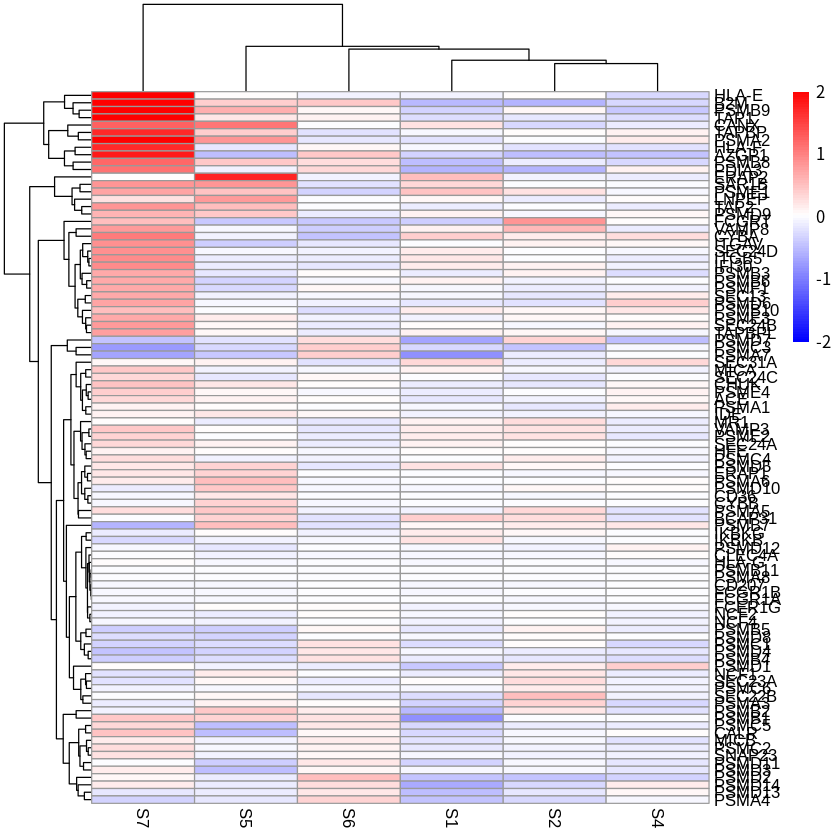

In [176]:
pheatmap(gene_exp_matrix$RNA,breaks=seq(-2,2,length.out=100),color=colorRampPalette(c("blue","white", "red"))(100))

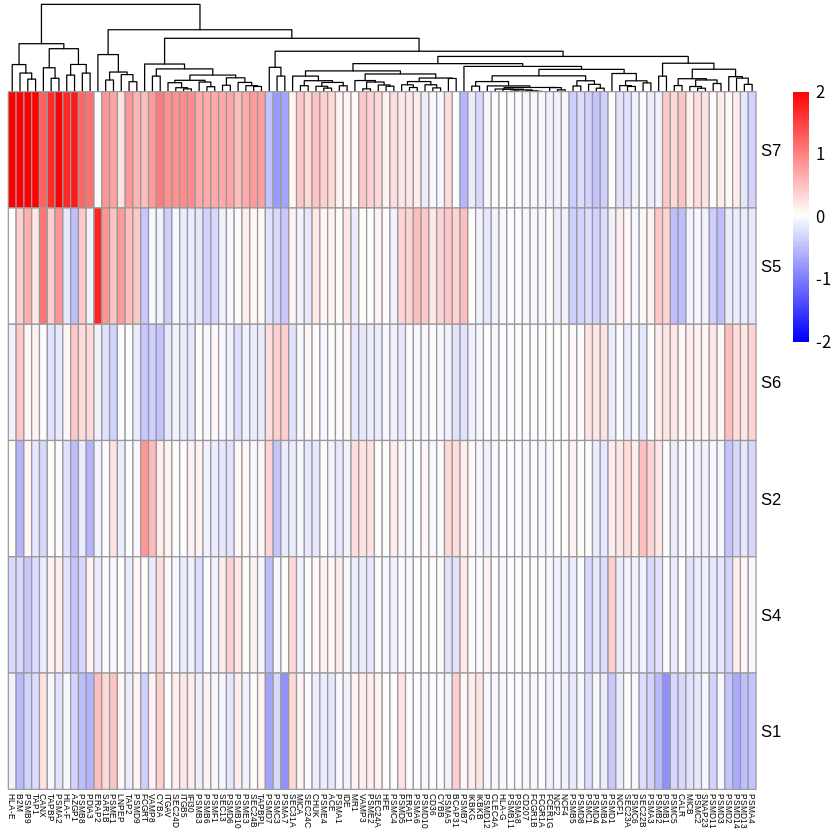

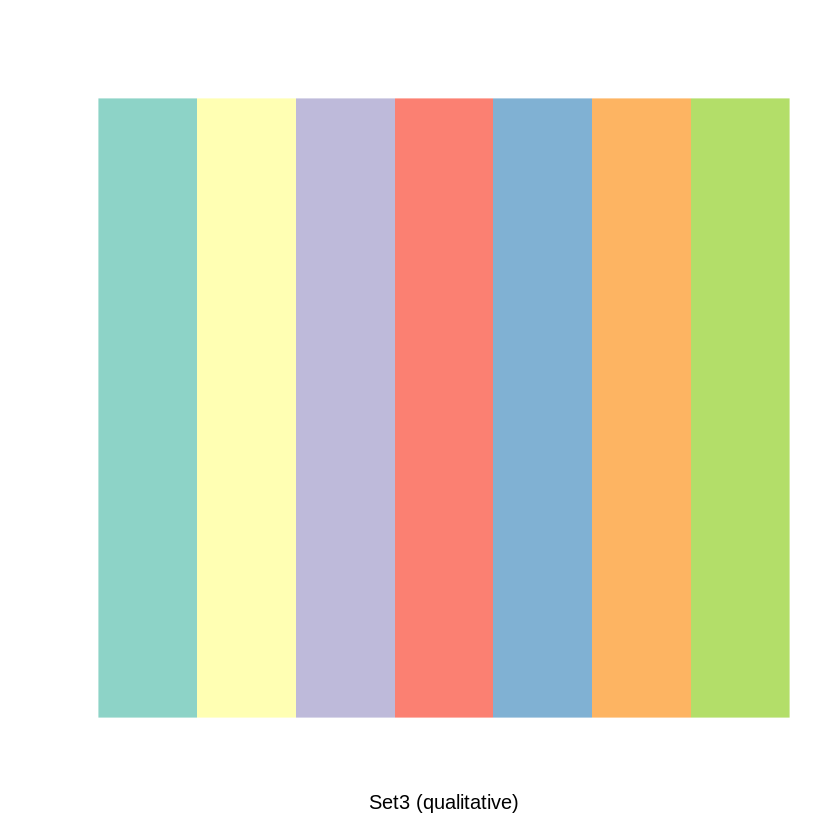

In [177]:
pheatmap(t(gene_exp_matrix$RNA[,order(colSums(gene_exp_matrix$RNA),decreasing=T)]),breaks=seq(-2,2,length.out=100),color=colorRampPalette(c("blue","white", "red"))(100),fontsize_col=5,cluster_rows=F)

display.brewer.pal(n = 7, name = 'Set3')

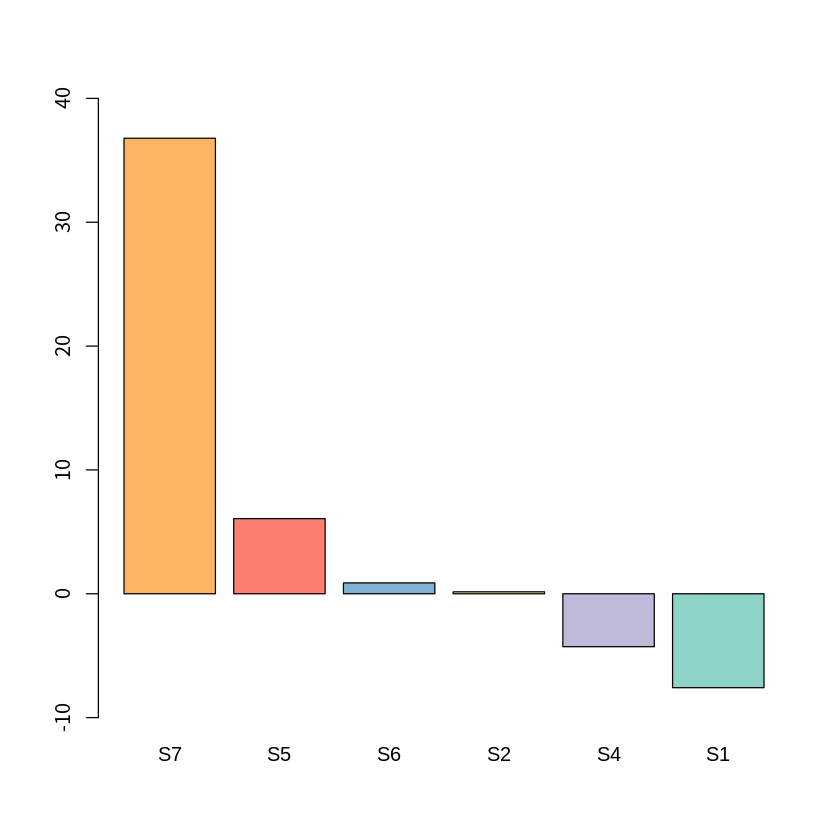

In [178]:
barplot(rowSums(t(gene_exp_matrix$RNA[,order(colSums(gene_exp_matrix$RNA),decreasing=T)]), ),col= brewer.pal(n = 7, name = "Set3")[order(colSums(gene_exp_matrix$RNA),decreasing=T)],ylim=c(-10,40))


In [185]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 16.04.7 LTS

Matrix products: default
BLAS/LAPACK: /home/inspur/miniconda3/envs/sclc_ldk/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=zh_CN.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=zh_CN.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=zh_CN.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=zh_CN.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=zh_CN.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] GSEABase_1.56.0             graph_1.72.0               
 [3] annotate_1.72.0             XML_3.99-0.8               
 [5] reticulate_1.22             harmony_0.1.0              
 [7] Rcpp_1.0.7                  pheatmap_1.0.12            
 [9] scales_1.1.1                SingleCellE